In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ordered roughly by accuracy
cases = ['DUP22q11_2','DEL15q11_2','DUP1q21_1','DEL1q21_1','DUP16p11_2','DEL16p11_2','DEL22q11_2','ADHD','ASD','SZ','BIP']

case_labels =       ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223',

                    'DEL 22q11.2     n=43',
                    'DEL 16p11.2      n=32',
                    
                    'DUP 16p11.2     n=35',
                    'DEL 1q21.1       n=25',
                    'DUP 1q21.1       n=19',
                    'DEL 15q11.2    n=103',
                    'DUP 22q11.2     n=22']
case_labels.reverse()

p_single = '../results_paper/baseline/mlp/'

p_mmoe3 = '../results_paper/mtl/mmoe_3/'
p_mmoe5 = '../results_paper/mtl/mmoe_5/'
p_mmoe10 = '../results_paper/mtl/mmoe_10/'
p_mmoe20 = '../results_paper/mtl/mmoe_20/'

# Load Data

In [5]:
# Single Task
st_data_conn = []
for case in cases:
    folds_conn = []
    for fold in range(5):
        # Connectomes
        p_parent = os.path.join(p_single, f"{case}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds_conn.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[case])

    st_data_conn.append(folds_conn)

st_data_conn = dict(zip(cases,st_data_conn))

In [7]:
# Multi-task
mmoe3_data = []
for fold in range(5):
    # Connectomes
    p_parent = os.path.join(p_mmoe3, f"fold_{fold}")
    if os.path.exists(p_parent):
        files = [f for f in os.listdir(p_parent) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            mmoe3_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

mmoe5_data = []
for fold in range(5):
    # Connectomes
    p_parent = os.path.join(p_mmoe5, f"fold_{fold}")
    if os.path.exists(p_parent):
        files = [f for f in os.listdir(p_parent) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            mmoe5_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

mmoe10_data = []
for fold in range(5):
    # Connectomes
    p_parent = os.path.join(p_mmoe10, f"fold_{fold}")
    if os.path.exists(p_parent):
        files = [f for f in os.listdir(p_parent) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            mmoe10_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

mmoe20_data = []
for fold in range(5):
    # Connectomes
    p_parent = os.path.join(p_mmoe20, f"fold_{fold}")
    if os.path.exists(p_parent):
        files = [f for f in os.listdir(p_parent) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            mmoe20_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Accuracy

In [8]:
# Single Task
st_acc_conn = []
st_acc_conn_std = []
for case in cases:
    # Connectomes
    vals = [st_data_conn[case][fold]['Accuracy/test'].iloc[-1] for fold in range(5)]
    st_acc_conn.append(np.mean(vals))
    st_acc_conn_std.append(np.std(vals))


st_acc_conn = pd.Series(st_acc_conn,index=cases)
st_acc_conn_std = pd.Series(st_acc_conn_std,index=cases)

In [9]:
st_acc_conn

DUP22q11_2    41.388889
DEL15q11_2    54.378630
DUP1q21_1     53.214286
DEL1q21_1     70.000000
DUP16p11_2    64.285714
DEL16p11_2    73.461538
DEL22q11_2    84.967320
ADHD          55.206897
ASD           61.085219
SZ            75.709892
BIP           79.012097
dtype: float64

In [13]:
# Multi-task
mmoe3_acc = []
for fold in range(len(mmoe3_data)):
    # Connectomes
    df = mmoe3_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mmoe3_acc.append(df)
    
mmoe3_acc_std = pd.concat(mmoe3_acc,axis=1).std(axis=1)
mmoe3_acc = pd.concat(mmoe3_acc,axis=1).mean(axis=1)

# Multi-task
mmoe5_acc = []
for fold in range(len(mmoe5_data)):
    # Connectomes
    df = mmoe5_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mmoe5_acc.append(df)
    
mmoe5_acc_std = pd.concat(mmoe5_acc,axis=1).std(axis=1)
mmoe5_acc = pd.concat(mmoe5_acc,axis=1).mean(axis=1)

# Multi-task
mmoe10_acc = []
for fold in range(len(mmoe10_data)):
    # Connectomes
    df = mmoe10_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mmoe10_acc.append(df)
    
mmoe10_acc_std = pd.concat(mmoe10_acc,axis=1).std(axis=1)
mmoe10_acc = pd.concat(mmoe10_acc,axis=1).mean(axis=1)

# Multi-task
mmoe20_acc = []
for fold in range(len(mmoe20_data)):
    # Connectomes
    df = mmoe20_data[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mmoe20_acc.append(df)
    
mmoe20_acc_std = pd.concat(mmoe20_acc,axis=1).std(axis=1)
mmoe20_acc = pd.concat(mmoe20_acc,axis=1).mean(axis=1)

# Tables

In [14]:
# Connectomes
df_conn = pd.concat([st_acc_conn,st_acc_conn_std,mmoe3_acc,mmoe3_acc_std,mmoe5_acc,mmoe5_acc_std,mmoe10_acc,mmoe10_acc_std,mmoe20_acc,mmoe20_acc_std],axis=1)
df_conn.columns = ['ST','ST_std','MMOE3','MMOE3_std','MMOE5','MMOE5_std','MMOE10','MMOE10_std','MMOE20','MMOE20_std']
df_conn

,ST,ST_std,MMOE3,MMOE3_std,MMOE5,MMOE5_std,MMOE10,MMOE10_std,MMOE20,MMOE20_std
DUP22q11_2,41.388889,13.391079,63.055556,18.726838,70.555556,5.414886,74.074074,6.415003,55.555556,15.713484
DEL15q11_2,54.378630,4.057667,53.403020,8.642161,54.819977,5.627894,58.865660,0.569974,50.580720,2.545913
DUP1q21_1,53.214286,22.314999,52.857143,9.665978,50.357143,8.025788,54.166667,19.094065,62.500000,0.000000
DEL1q21_1,70.000000,14.142136,62.000000,13.038405,56.000000,18.165902,46.666667,5.773503,65.000000,21.213203
DUP16p11_2,64.285714,4.517540,67.142857,19.298937,65.714286,13.739560,59.523810,21.821789,60.714286,5.050763
DEL16p11_2,73.461538,7.730674,67.307692,13.461538,68.974359,11.764174,66.666667,4.441156,65.384615,5.439283
DEL22q11_2,84.967320,8.571815,75.490196,5.279573,77.908497,8.700424,82.679739,0.566030,60.130719,6.470258
ADHD,55.206897,2.576093,60.581709,5.977577,58.332834,6.057959,61.841579,3.265445,56.694153,5.162834
ASD,61.085219,2.463449,62.152426,4.513012,59.919509,2.607992,57.495591,1.858140,59.523810,1.870653
SZ,75.709892,1.652202,70.702510,4.056961,72.423720,3.097959,72.395833,3.932205,71.484375,7.181553


In [15]:
df_conn.mean()

ST            64.791862
ST_std         7.676434
MMOE3         65.631925
MMOE3_std      9.917412
MMOE5         65.028027
MMOE5_std      7.968527
MMOE10        64.644545
MMOE10_std     7.352349
MMOE20        62.193703
MMOE20_std     6.623423
dtype: float64

# Plots

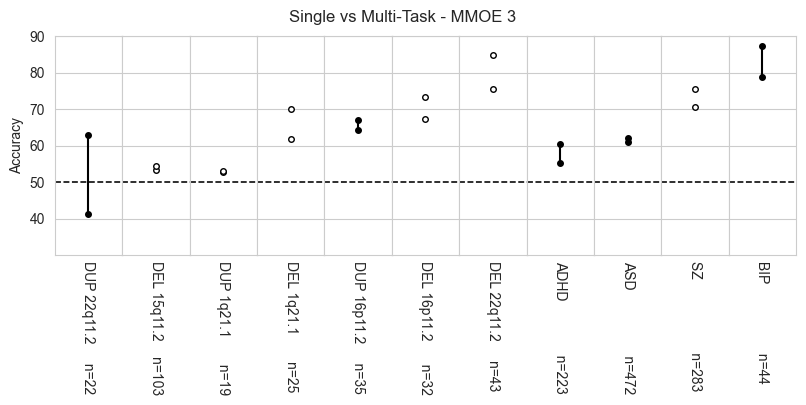

In [17]:
###############
# CONNECTOMES #
###############
title = 'Single vs Multi-Task - MMOE 3'
fig,ax = plt.subplots(1,len(cases),figsize=(8,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MMOE3']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)

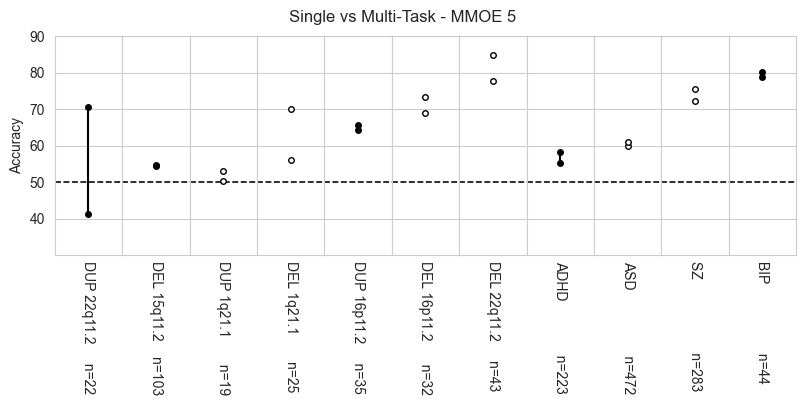

In [18]:
###############
# CONNECTOMES #
###############
title = 'Single vs Multi-Task - MMOE 5'
fig,ax = plt.subplots(1,len(cases),figsize=(8,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MMOE5']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)

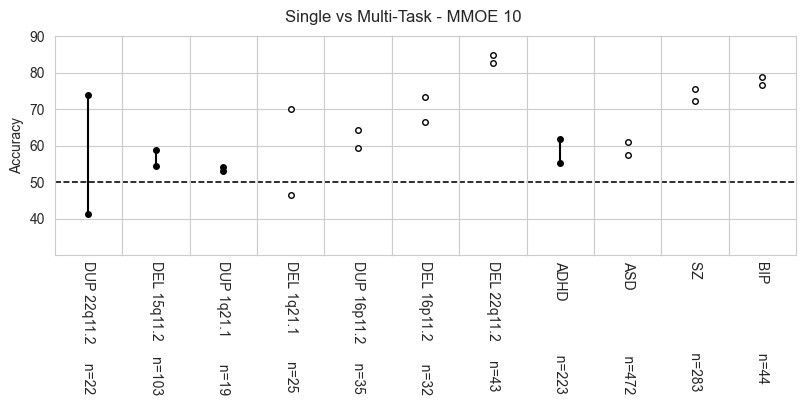

In [21]:
###############
# CONNECTOMES #
###############
title = 'Single vs Multi-Task - MMOE 10'
fig,ax = plt.subplots(1,len(cases),figsize=(8,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MMOE10']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)

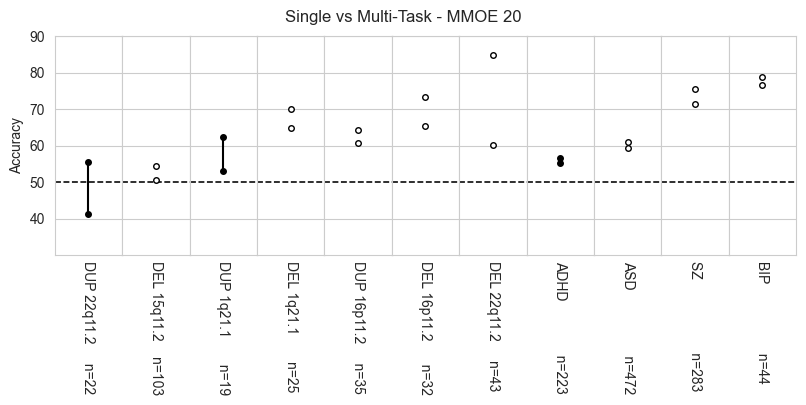

In [20]:
###############
# CONNECTOMES #
###############
title = 'Single vs Multi-Task - MMOE 20'
fig,ax = plt.subplots(1,len(cases),figsize=(8,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MMOE20']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)